<a href="https://colab.research.google.com/github/LaLlorona/machine_deep_learning/blob/main/FromChapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300')


apple = fruits[0: 100].reshape(-1, 100 * 100)
pineapple = fruits[100: 200].reshape(-1, 100 * 100)
banana = fruits[200: 300].reshape(-1, 100 * 100)



plt.hist(np.mean(apple, axis=1), alpha = 0.5)
plt.hist(np.mean(pineapple, axis=1), alpha = 0.5)
plt.hist(np.mean(banana, axis=1), alpha = 0.5)

# fig, axs = plt.subplots(1, 3, figsize = (20, 5))

# axs[0].bar(range(10000), np.mean(apple, axis = 0))
# axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
# axs[2].bar(range(10000), np.mean(banana, axis = 0))
# plt.show()

apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].imshow(apple_mean, cmap="gray_r")
axs[1].imshow(pineapple_mean, cmap="gray_r")
axs[2].imshow(banana_mean, cmap="gray_r")
plt.show()

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()

abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()

abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300')
print(fruits.shape)
fruits_2d = fruits.reshape(-1, 100 * 100)

from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_2d)
print (km.labels_)

print (np.unique(km.labels_, return_counts=True))

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):
  n = len(arr)
  rows = int(np.ceil(n / 10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

# print ('-----------------------------------classified as apple------------------------------------------')
# draw_fruits(fruits[km.labels_ == 0])
# print ('-----------------------------------classified as banana------------------------------------------')
# draw_fruits(fruits[km.labels_ == 1])
# print ('-----------------------------------classified as pineapple------------------------------------------')
# draw_fruits(fruits[km.labels_ == 2])

# print ('-----------------------------------cluster centers------------------------------------------')
# draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio = 3)

print(km.transform(fruits_2d[100: 101]))

print (km.predict(fruits_2d[100: 101]))

draw_fruits(fruits[100: 101])

inertia = []
for k in range(2, 10):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300')
fruits_2d = fruits.reshape(-1, 100 * 100)

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

def draw_fruits(arr, ratio = 1):
  n = len(arr)
  rows = int(np.ceil(n / 10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

# for start in [0, 100, 200]:
#   draw_fruits(fruits_reconstruct[start: start + 100])
#   print('\n')

# print (np.sum(pca.explained_variance_ratio_))

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

print('--------------------------------------result without compress-----------------------------------------')
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

print('--------------------------------------result with compress-----------------------------------------')
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
truncated = pca.transform(fruits_2d)
print(truncated.shape)
scores = cross_validate(lr, truncated, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(truncated)
for i in range (3):
  draw_fruits(fruits[km.labels_ == i])

for label in range (3):
  data = truncated[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [ ]:
# from tensorflow import keras
# (train_input, train_target), (test_input, test_target) =\ keras.datasets.fashin_mnist.load_data()
# print (train_input.shape, train_target.shape)

from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print (train_input.shape, train_target.shape)

print (test_input.shape, test_target.shape)

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 10, figsize = (10,10))
for i in range (10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

# for i in range (10):
#   print (train_target[i])
# # print(train_target[i] for i in range(10))
# print(np.unique(train_target, return_counts = True))
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
print (train_scaled.shape)

# from sklearn.model_selection import cross_validate
# from sklearn.linear_model import SGDClassifier
# sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)
# scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
# print(np.mean(scores['test_score']))

from tensorflow import keras
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

print (train_scaled.shape, val_scaled.shape)

dense = keras.layers.Dense(10, activation='softmax', input_shape = (784,))
model = keras.Sequential(dense)
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

model.evaluate(val_scaled, val_target)

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
# train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')
print ('--------------------------------------using normal DNN------------------------------------------')
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))




model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs = 5)

model.evaluate(val_scaled, val_target)

print ('--------------------------------------using Adam------------------------------------------')
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs = 5)

model.evaluate(val_scaled, val_target)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


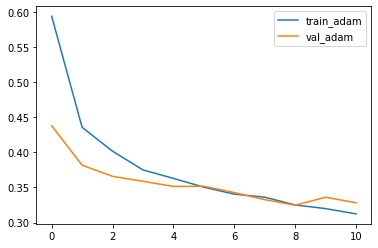

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model
model = model_fn(keras.layers.Dropout(0.3))
model.summary()




import matplotlib.pyplot as plt


model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 11, verbose = 0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_adam', 'val_adam'])
plt.show()

model.save_weights('model-weights.h5')
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 981776 Apr  7 01:17 best-model.h5
-rw-r--r-- 1 root root 332480 Apr  7 00:55 model-weights.h5
-rw-r--r-- 1 root root 981776 Apr  7 00:55 model-whole.h5


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model
import numpy as np
import matplotlib.pyplot as plt


model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

print ('------------------------------------------using current model------------------------------------------------')
print (model.evaluate(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
print ('------------------------------------------using saved checkpoint------------------------------------------------')
model = keras.models.load_model('best-model.h5')
print (model.evaluate(val_scaled, val_target))

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu')

Keras.layers.conv